# Recurrent Graph Convolutional Network for Epidemic Modeling

Peter Racioppo

### Installations:

In [1]:
# # !pip install torch_geometric
!pip install torch_geometric_temporal

# # Pytorch Geometric Temporal:
# # >@inproceedings{rozemberczki2021pytorch,
# #                 author = {Benedek Rozemberczki and Paul Scherer and Yixuan He and George Panagopoulos and Alexander Riedel and Maria Astefanoaei and Oliver Kiss and Ferenc Beres and and Guzman Lopez and Nicolas Collignon and Rik Sarkar},
# #                 title = {{PyTorch Geometric Temporal: Spatiotemporal Signal Processing with Neural Machine Learning Models}},
# #                 year = {2021},
# #                 booktitle={Proceedings of the 30th ACM International Conference on Information and Knowledge Management},
# #                 pages = {4564–4573},
# # }

     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 325 kB 35.2 MB/s 
     |████████████████████████████████| 407 kB 35.1 MB/s 
     |████████████████████████████████| 45 kB 4.1 MB/s 
  Created wheel for torch-geometric-temporal: filename=torch_geometric_temporal-0.41-py3-none-any.whl size=69657 sha256=4b3362ce80b9ebb17a8d4622406e283cede46734a38061f7e16de80f675f808e
  Stored in directory: /root/.cache/pip/wheels/d9/96/b2/641bbc9d0b104f4edbfe7b679a516abb3abc7777ea76a77a16
  Created wheel for torch-cluster: filename=torch_cluster-1.5.9-cp37-cp37m-linux_x86_64.whl size=317965 sha256=e8cc6f799e2ee00cab5735175d61c0d6a4e87f2099b6281ab0fb2df55fc7d46f
  Stored in directory: /root/.cache/pip/wheels/a6/60/d8/8bb27f58d8578ba8046f7ea0aadbae89a731db884a644ba361
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=535570 sha256=e7faf125f1f08404142da8744af23eca659be

### Imports:

In [2]:
# Imports

import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

import random
import math
import scipy.linalg
import networkx as nx
import os

import torch_geometric_temporal

### Loading in the data:

In [3]:
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

loader = ChickenpoxDatasetLoader()

dataset = loader.get_dataset()

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)
# Note: train_ratio=0.8 means we're using 80% of the data for training and 20% for testing

In [4]:
# Basic tests with the data:

x_i = 0
y_i = 0
for train_time, snapshot in enumerate(train_dataset):
  # print(train_time)
  x = np.array(snapshot.x)
  y = np.array(snapshot.y)
  edge_idx = np.array(snapshot.edge_index)
  edge_attr = np.array(snapshot.edge_attr)

  dx = x - x_i
  x_i = x

  dy = y - y_i
  y_i = y

for test_time, _ in enumerate(test_dataset):
  # print(test_time)
  pass

print(dataset)
print(snapshot)

X = torch.from_numpy(np.concatenate((x,dx)))
Y = torch.from_numpy(np.concatenate((y,dy)))

# print(snapshot.x)
# print(X)
print(snapshot.x.type())
print(X.type())
print(np.shape(snapshot.x))
print(np.shape(X))

# print(snapshot.y)
# print(Y)
print(snapshot.y.type())
print(Y.type())
print(np.shape(snapshot.y))
print(np.shape(Y))

# edge_idx_2 = torch.from_numpy(edge_idx)
# print(snapshot.edge_index)
# print(edge_idx_2)

Data(x=[20, 4], edge_index=[2, 102], edge_attr=[102], y=[20])
torch.FloatTensor
torch.FloatTensor
torch.Size([20, 4])
torch.Size([40, 4])
torch.FloatTensor
torch.FloatTensor
torch.Size([20])
torch.Size([40])


In [5]:
# Get nodes, features, edge list, and edge atrributes for a particular snapshot
x = np.array(snapshot.x)
edge_idx = np.array(snapshot.edge_index)
edge_attr = np.array(snapshot.edge_attr)

# print(x)
# print(edge_idx)
# print(edge_attr)

# print(np.shape(x))
# print(np.shape(edge_idx))
# print(np.shape(edge_attr))

In [6]:
N_n = np.shape(x)[0] # Number of nodes
N_f = np.shape(x)[1] # Number of features
N_e = np.shape(edge_idx)[1] # Number of edges

print('Number of nodes:', N_n)
print('Number of features:', N_f)
print('Number of edges:', N_e)
print('Number of training time steps:', train_time)
print('Number of testing time steps:', test_time)

Number of nodes: 20
Number of features: 4
Number of edges: 102
Number of training time steps: 412
Number of testing time steps: 103


### Loading the 50-State COVID Data (unfinished):

In [7]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [8]:
# os.system('clear')
# # Import Data
# PROJECT_ROOT = "/gdrive/My Drive/"

# features = {
#     'Confirmed',
#     'Deaths',
#     'Recovered',
#     'Mortality Rate',
#     'Testing Rate',
#     'Population',
#     'Mobility Data'
# }
# feature_labels = np.array(list(features))

# train = np.load(os.path.join(PROJECT_ROOT,"CS245_train.npy"))
# x1_train = train[:,:,0]
# xf_train = train[:,:,2:7]
# dim = np.shape(x1_train)[0],np.shape(x1_train)[1],1
# x1_train = np.reshape(x1_train,(dim))

# x0_train = np.zeros_like(x1_train)
# for i in np.arange(np.shape(x1_train)[0]):
#   x0_train[i,:,0] = np.arange(0,np.shape(x1_train)[1])+1

# # x_train = np.concatenate((x1_train,xf_train),axis=2)
# x_train = np.concatenate((x0_train,x1_train,xf_train),axis=2)

# y_train = train[:,:,1]

# print(np.shape(x_train))
# print(np.shape(y_train))

# test = np.load(os.path.join(PROJECT_ROOT,"CS245_test.npy"))
# x1_test = test[:,:,0]
# xf_test = test[:,:,2:7]
# dim = np.shape(x1_test)[0],np.shape(x1_test)[1],1
# x1_test = np.reshape(x1_test,(dim))
# x_test = np.concatenate((x1_test,xf_test),axis=2)
# y_test = test[:,:,1]
# print(np.shape(x_test))
# print(np.shape(y_test))

In [9]:
# # Convert to torch tensors
# X_train = torch.from_numpy(x_train_split)
# Y_train = torch.from_numpy(y_train_split)
# X_valid = torch.from_numpy(x_valid)
# Y_valid = torch.from_numpy(y_valid)
# X_test = torch.from_numpy(x_test)
# Y_test = torch.from_numpy(y_test)

# # Pytorch TensorDataset
# train_ds = torchdata.TensorDataset(X_train, Y_train)
# valid_ds = torchdata.TensorDataset(X_valid, Y_valid)
# test_ds = torchdata.TensorDataset(X_test, Y_test)
# print(len(train_ds))
# print(np.shape(Y_train))

# states, N_f, steps = x_train_t.shape
# print(states)
# print(N_f)
# print(steps)
# # num_classes = len(events)

### Basic graph functionality

In [10]:
# Build an adjecency matrix from an edge_list
def f_Adj_Mat_from_Edge_list(N_n,edge_list,edge_attr,uea=0):
  Adj = np.zeros((N_n,N_n)) # Initialize adjacency matrix
  for e in np.arange(np.shape(edge_list)[1]): # Index e of edge in edge list
    i, j = edge_list[:,e] # Get the in and out nodes of an edge
    if uea==1:
      Adj[i,j] = edge_attr[e] # Add edge attribute to ijth entry of adj matrix
    else:
      Adj[i,j] = 1
  return Adj

# Build an edge_list from an adjacency matrix
def f_Edge_list_from_Adj_Mat(Adj):
  N_n = np.shape(Adj)[0] # Number of nodes
  N_e = sum(sum(Adj>0)) # Number of edges
  edge_list = np.zeros((2,N_e)) # Initialize edge list
  edge_attr = np.zeros(N_e) # Initialize edge attribute list
  # Loop through adjacency matrix and put build edge list:
  k = 0
  for i in np.arange(N_n):
    for j in np.arange(N_n):
      if Adj[i,j] > 0:
        edge_list[:,k] = np.array([i,j]) # Add edge btwn nodes i,j to edge list
        edge_attr[k] = Adj[i,j] # Add ijth value of Adj to edge attribute list
        k += 1
  return edge_list.astype(int), edge_attr.astype(int)

# # Test
N_n = np.max(edge_idx)+1 # Number of nodes
Adj = f_Adj_Mat_from_Edge_list(N_n,edge_idx,edge_attr)
# edge_list, edge_attr = f_Edge_list_from_Adj_Mat(G)
# edge_list
# sum(sum(edge_list-edge_idx))

### Visualizing the Data:

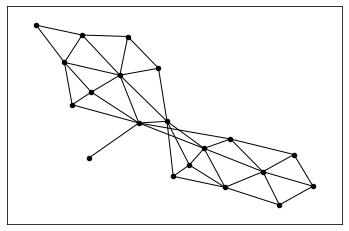

In [11]:
# Plot the graph structure at a single time step
G = f_Adj_Mat_from_Edge_list(N_n,edge_idx,edge_attr) # Get adjacency matrix
G_plot = G - np.eye(N_n) # Remove self loops (for plotting)

nx.draw_networkx(nx.from_numpy_matrix(G_plot),with_labels=False,node_size=20,node_color='k')
plt.show()

### Functionality for Expanding the Graph

In [12]:
# This function expands the graph, adding N new nodes to represent time
# derivatives of features and adding edges according to the Markov assumptions
# relating position to velocity.
# NOTE: This function assumes all edge atrributes are 1.
def f_Expand_Graph(N_n,edge_list,sa=1):
  N_n2 = 2*N_n # Number of nodes doubles
  G2 = np.eye(N_n2) # Initialize G2, including self-loops
  # Loop through adj matrix and add edges going out of v nodes:
  for i in np.arange(N_n,N_n2):
      G2[i,i-N_n] = 1 # Edge from v_i to x_i
      # If vertices are all connected:
      for j in np.arange(N_n,N_n2):
        if sa == 1 or len(edge_list) == 0:
        # (If v's are fully-connected with each other)
          G2[i,j] = 1 # Edge from v_i to v_j & v_j to v_i

  if len(edge_list) == 0: # If edge_list is empty
    # Connect all position nodes to all velocity nodes:
    for i in np.arange(N_n):
        for j in np.arange(N_n,N_n2):
          G2[i,j] = 1 # Edge from x_i to v_j

  else: # If edge_list is not empty
    # Connect position nodes to velocity nodes, following the same
    # connectivity pattern as in the smaller graph.
    # Loop through edge list:
    for e in np.arange(np.shape(edge_list)[1]):
      i, j = edge_list[:,e]
      G2[i,j+N_n] = 1 # Edge from x_i to v_j
      # If velocity nodes are connected in the same pattern as position nodes:
      if sa == 0:
        G2[i+N_n,j+N_n] = 1 # Edge from v_i to v_j
        # G2[j+N_n,i+N_n] = 1 # Edge from v_j to v_i

  edge_list_2, edge_attr_2 = f_Edge_list_from_Adj_Mat(G2) # Get edge list
  return edge_list_2, edge_attr_2, G2

# # Test:
# edge_list_2, edge_attr_2, G2_f = f_Expand_Graph(N_n,edge_idx,sa=1)
# # print(edge_idx)
# # print(edge_list_2)
# # print(edge_attr)
# # print(torch.from_numpy(edge_attr_2.astype(float)))
# # print(sum(sum(G2)))
# print(np.shape(edge_idx))
# print(np.shape(edge_list_2))
# print(np.shape(G2_f))
# # print(np.shape(edge_attr_2))

In [13]:
# This function expands 1 node at a time, adding a new node to represent its 
# time derivative and adding & removing edges according to the Markov
# assumptions relating position to velocity.
# NOTE: This function assumes all edge atrributes are 1.
def f_Expand_Node(N_n,N_i,edge_list,edge_list_i,edge_attr,expand_node,expanded_node_list,sa=1):
  N_n2 = N_i+1 # Number of nodes increases by 1
  expand_vnode = N_i # Index of v node corresponding to node being expanded
  # Append new expanded node to list:
  expanded_node_list = np.append(expanded_node_list,expand_node)
  # Get adjacency matrix:
  G2 = f_Adj_Mat_from_Edge_list(N_n2,edge_list_i,edge_attr)
  # Add edges going out of new node v:
  G2[expand_vnode,expand_node] = 1 # Edge from v to x
  G2[expand_node,expand_vnode] = 1 # Edge from x to v
  # G2[expand_vnode,expand_vnode] = 1 # Edge from v to v
  # If vertices are all connected:
  for i in np.arange(N_n,N_n2): # Loop through all v's
    if sa == 1 or len(edge_list) == 0:
      # (If v's are fully-connected with each other)
      G2[i,expand_vnode] = 1 # Edge from v_i to v
      G2[expand_vnode,i] = 1 # Edge from v to v_i

  if len(edge_list) == 0: # If edge_list is empty
    # Connect all position nodes to new velocity node:
    for i in np.arange(N_n): # Loop through x nodes
      G2[i,expand_vnode] = 1 # Edge from x_i to v
      if i != expand_node: # If not the self-loop for expand_node
        G2[expand_node,i] = 0 # Remove edges from expand_node to all other nodes

  else: # If edge_list is not empty
      # Connect position nodes to v, following the same
      # connectivity pattern as in the smaller graph.
      for e in np.arange(np.shape(edge_list)[1]): # Loop through edge list:
        i, j = edge_list[:,e] # Get starting and ending nodes of edges
        if j == expand_node: # If ending node is expand_node
          G2[i,expand_vnode] = 1 # Edge from x_i to v

        # Remove all edges from expansion node to other nodes:
        if i == expand_node and j <= N_n and i != j:
        # (If starting node is expand_node and ending nodes is an x node
        # and this is not a self loop)
          G2[i,j] = 0 # Remove edge

        # If velocity nodes are connected in the same pattern as position nodes:
        if sa == 0:
          if j == expand_node and i in expanded_node_list:
          # (If ending node is expand_node and starting node x_i is in the list
          # of previously-expanded nodes)
            idx = np.where(expanded_node_list==i)[0][0] # Index of x_i
            G2[idx+N_n,expand_vnode] = 1 # Edge from v_i to v
          if i == expand_node and j in expanded_node_list:
          # (If starting node is expand_node and ending node x_j is in the list
          # of previously-expanded nodes)  
            idx = np.where(expanded_node_list==j)[0][0] # Index of x_j
            G2[expand_vnode,idx+N_n] = 1 # Edge from v to v_j

  edge_list_2, edge_attr_2 = f_Edge_list_from_Adj_Mat(G2) # Get edge list
  N_i = N_n2 # Update number of nodes

  return edge_list_2, edge_attr_2, expanded_node_list, N_i, G2

# # Test 1 (single run):
# N_i = N_n
# edge_list = edge_idx
# edge_list_i = edge_list
# sa = 0
# expanded_node_list = np.array([]).astype(int)
# expand_node = 0
# edge_list_2, edge_attr_2, expanded_node_list, N_i, G2 = f_Expand_Node(N_n,N_i,edge_list,edge_list_i,edge_attr,expand_node,expanded_node_list,sa=sa)
# # print(edge_list)
# # print(edge_list_2)
# print(np.shape(edge_list))
# print(np.shape(edge_list_2))
# print(expanded_node_list)

In [14]:
# This function expands N nodes at a time, adding new nodes to represent
# time derivatives and adding & removing edges according to the Markov
# assumptions relating position to velocity.
# NOTE: This function assumes all edge atrributes are 1.
# NOTE: This implementation is inefficient, because it calls f_Expand_Node
# repeatedly, which means that edges are added which are later erased, and vice
# versa. It would be better to construct the graph all at once (ran out of time).
def f_Expand_N_Nodes(N_n,edge_list,edge_attr,expand_node_v,sa=0):
  N_i = N_n # Initialize number of nodes in expanded graph to N_n
  edge_list_i = edge_list # Initialize edge list of expanded graph to that of original graph
  expanded_node_list = np.array([]).astype(int) # Initialize expanded_node_list to be empty
  for expand_node in expand_node_v: # For every node we are to expand
    # Get features of graph, expanded by 1 node
    edge_list_i, edge_attr_i, expanded_node_list, N_i, G2 = f_Expand_Node(N_n,N_i,edge_list,edge_list_i,edge_attr,expand_node,expanded_node_list,sa=sa)

  return edge_list_i, edge_attr_i, expanded_node_list, G2

# # Test:
# expand_node_v = np.random.choice(np.arange(N_n),size=N_n, replace=False)
# edge_list_i, edge_attr_i, expanded_node_list, G2 = f_Expand_N_Nodes(N_n,edge_idx,edge_attr,expand_node_v,sa=sa)

# edge_list_2, edge_attr_2, G2_f = f_Expand_Graph(N_n,edge_idx,sa=sa)

# print(expanded_node_list)
# print(np.shape(edge_idx))
# print(np.shape(edge_list_i))
# print(np.sum(G2_f - G2))

# expand_node_v = np.random.choice(np.arange(N_n),size=1, replace=False)
# edge_list_i, edge_attr_i, expanded_node_list, G2 = f_Expand_N_Nodes(N_n,edge_idx,edge_attr,expand_node_v,sa=sa)

### Functionality for Sampling

In [15]:
# Drop k random edges from the graph.
def f_delete_k_edges(edge_idx,edge_attr,k):
  N_e = np.shape(edge_idx)[1] # Number of edges
  rands = np.random.choice(np.arange(N_e),k,replace=False) # Rand edges to drop
  edge_idx_d = np.delete(edge_idx, rands, 1) # Delete edges from edge list
  edge_attr_d = np.delete(edge_attr, rands) # Delete edges from attribute list
  return edge_idx_d, edge_attr_d

# # Test:
# k = int(N_e/10)
# edge_idx = np.array(snapshot.edge_index)
# edge_attr = np.array(snapshot.edge_attr)
# edge_idx_d, edge_attr_d = f_delete_k_edges(edge_idx,edge_attr,k)
# print(k)
# print(np.shape(edge_idx)[1])
# print(np.shape(edge_idx_d)[1])
# print(np.shape(edge_attr_d)[0])

# k = 0
# edge_idx_d, edge_attr_d = f_delete_k_edges(edge_idx,edge_attr,k)
# print(k)
# print(np.shape(edge_idx)[1])
# print(np.shape(edge_idx_d)[1])
# print(np.shape(edge_attr_d)[0])

In [16]:
# Sample a subgraph of the adjacency matrix using a random walk
# Randomly move to an adjacent node, with probability proportional to the edge weight
# After a random walk of length num_hops, return all nodes and edges visited.
def f_Random_Walk_Sampler(num_hops,N_n,edge_list_o,edge_attr_o):
  Adj = f_Adj_Mat_from_Edge_list(N_n,edge_list_o,edge_attr_o)
  node_list = np.zeros(num_hops) # Add starting node to node list
  edge_list = np.zeros((2,num_hops))-1 # Initialize edge list
  n = np.random.choice(N_n) # Start at a random node
  n_i = n # Var to hold previous node
  for i in np.arange(num_hops):
    idx_v = [] # Array of indices of neighboring nodes
    prob_v = [] # Array of edge probabilities
    for j in np.arange(N_n):
      if Adj[n,j] > 0: # If there is an edge
        idx_v.append(j) # Append index of neighboring nodes
        prob_v.append(Adj[n,j]) # Append weight of edge of this node
    prob_v /= np.sum(prob_v) # Normalize probability
    # Randomly choose one of the neighboring nodes
    n_idx = np.random.choice(np.arange(len(prob_v)),p=prob_v) # Node index
    n = idx_v[n_idx] # New node
    node_list[i] = n # Add new node to array
    if n_i not in edge_list[0,:] or n not in edge_list[1,:]:
        edge_list[0,i] = n_i # Add starting node to edge list
        edge_list[1,i] = n # Add ending node to edge list
    n_i = n # Old node
  
  # Remove duplicate nodes and convert to int array:
  node_list = np.unique(node_list).astype(int)

  # Remove unused entries of edge_list:
  edge_list0 = edge_list[0,:]
  edge_list1 = edge_list[1,:]
  edge_list0 = edge_list0[edge_list0 != -1]
  edge_list1 = edge_list1[edge_list1 != -1]

  # Sort edge list by indices of first row:
  idx0 = np.argsort(edge_list0)
  edge_list0 = edge_list0[idx0]
  edge_list1 = edge_list1[idx0]

  # Combine start and end nodes back into edge list
  edge_list = np.zeros((2,np.shape(edge_list0)[0]))
  edge_list[0,:] = edge_list0
  edge_list[1,:] = edge_list1
  edge_list = edge_list.astype(int) # Convert to int array

  N_e2 = np.shape(edge_list)[1] # Number of edges in new edge list
  edge_attr = np.zeros(N_e2) # Initialize new edge attribute list
  count_v = np.zeros(N_e2) # Initialize counter (for testing)
  # For every edge in the new edge list:
  for k in np.arange(N_e2):
    v1 = edge_list[0,k] # Get out node
    v2 = edge_list[1,k] # Get in node
    # (there is an edge between v1 & v2 in the new edge list)
    # For every edge in old edge list:
    for j in np.arange(np.shape(edge_list_o)[1]):
      # If there is an edge between v1 & v2 in the old edge list
      if v1 == edge_list_o[0,j] and v2 == edge_list_o[1,j]:
          count_v[k] += 1 # Every element of count should equal 1
          # Add jth element of old edge attribute list to new
          # edge attribute list:
          edge_attr[k] = edge_attr_o[j]
  
  if np.sum(count_v-1) != 0:
    print('Error: There is an edge in the new edge list which is not in the old edge list.')
  
  return node_list, edge_list, edge_attr

# # Test:
# num_hops = int(3*N_n)
# node_list2, edge_list2, edge_attr2 = f_Random_Walk_Sampler(num_hops,N_n,edge_idx,edge_attr)
# print(node_list2)
# print(edge_list2)
# print(edge_idx)
# print(edge_attr)
# print(edge_attr2)

In [17]:
# train_loader = NeighborSampler(data.edge_index, node_idx=train_idx, 
#                                sizes=[15, 10, 5], batch_size=1024, 
#                                shuffle=True, num_workers=12)

### Define the recurrent graph neural network architectures:

In [18]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN
from torch_geometric_temporal.nn.recurrent import GConvLSTM
from torch_geometric_temporal.nn.attention import ASTGCN

# Network using the Diffusion Convolutional Gated Recurrent Unit:
class DCRNN_net(torch.nn.Module):
    def __init__(self, node_features, n_hidden=32, filter_sz=1):
        super(DCRNN_net, self).__init__()
        self.recurrent = DCRNN(node_features, n_hidden, filter_sz)
        self.linear = torch.nn.Linear(n_hidden, 1)
        # self.dropout(x, p=0.5, training=self.training) 

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        return h

In [19]:
# # Unused:

# # Network using the Chebyshev Graph Convolutional Long Short Term Memory Cell:
# class GConvLSTM_net(torch.nn.Module):
#     def __init__(self, node_features, n_hidden=32, filter_sz=1):
#         super(GConvLSTM_net, self).__init__()
#         self.recurrent = GConvLSTM(node_features, n_hidden, filter_sz)
#         self.linear = torch.nn.Linear(n_hidden, 1)
#         # self.dropout(x, p=0.5, training=self.training) 

#     def forward(self, x, edge_index, edge_weight):
#         h = self.recurrent(x, edge_index, edge_weight)
#         h = F.relu(h)
#         h = self.linear(h)
#         return h

# # Network using the Attention Based Spatial-Temporal Graph Convolutional Cell:
# class ASTGCN_net(torch.nn.Module):
#     def __init__(self, node_features, n_hidden=32, filter_sz=1):
#         super(ASTGCN_net, self).__init__()
#         self.recurrent = ASTGCN(node_features, n_hidden, filter_sz)
#         self.linear = torch.nn.Linear(n_hidden, 1)
#         # self.dropout(x, p=0.5, training=self.training) 

#     def forward(self, x, edge_index, edge_weight):
#         h = self.recurrent(x, edge_index, edge_weight)
#         h = F.relu(h)
#         h = self.linear(h)
#         return h

### Create a model and train it on the training split:

In [20]:
from tqdm import tqdm # (for showing progress of training)

# Train the model:
def f_Train_Model(model,optimizer,train_dataset,N_n,N_f,n_epochs=200):
  model.train()

  cost_v = np.zeros(n_epochs)
  for epoch in tqdm(np.arange(n_epochs)):
      cost = 0
      for time, snapshot in enumerate(train_dataset):
          y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
          # Reshape snapshot.y from size N_n to size (N_n,1):
          y = torch.from_numpy(np.array(snapshot.y).reshape((N_n,1)))
          cost += torch.mean((y_hat-y)**2)
      cost /= (time+1)
      cost_v[epoch] = cost
      cost.backward()
      optimizer.step()
      optimizer.zero_grad()

  return model, cost_v

### Train and test the DCRNN Model:

In [21]:
model = DCRNN_net(node_features=N_f)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model_o, cost_v_o = f_Train_Model(model,optimizer,train_dataset,N_n,N_f,n_epochs=200)

100%|██████████| 200/200 [02:31<00:00,  1.32it/s]


In [22]:
# Plot cost
def f_Plot_Cost(cost_v,xaxis,yaxis,title):
  plt.plot(cost_v)
  plt.xlabel(xaxis)
  plt.ylabel(yaxis)
  plt.title(title)
  plt.grid('on')

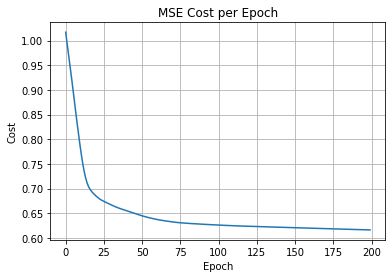

In [23]:
f1 = plt.figure()
f_Plot_Cost(cost_v_o,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
plt.show()

### Evaluate the performance of the trained model and compute the loss across all the spatial units and time periods:

In [24]:
# Evaluate the model
def f_Eval_Model(model,test_dataset,test_time,N_n):
  model.eval()
  cost = 0 # Average cost for an epoch
  tase = 0 # Time-average square error

  cost_t = np.zeros(test_time+1) # Array of costs for each time_step
  for time, snapshot in enumerate(test_dataset):
      y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
      # Reshape snapshot.y from size N_n to size (N_n,1):
      y = torch.from_numpy(np.array(snapshot.y).reshape((N_n,1)))
      error = y_hat - y # Error
      tase += error**2 # Time-average square error
      cost += torch.mean(error**2) # Add cost for time step to total cost for epoch
      cost_t[time] = torch.mean(error**2) # Add cost to array

  # Average over time elapsed:
  cost /= (time+1)
  tase /= (time+1)
  cost = cost.item()
  tase = tase.detach().cpu().numpy()
  
  return cost, cost_t, tase

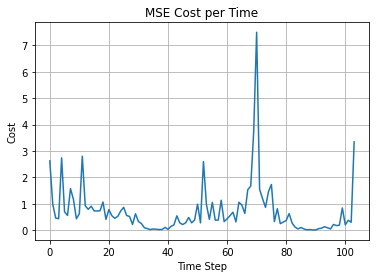

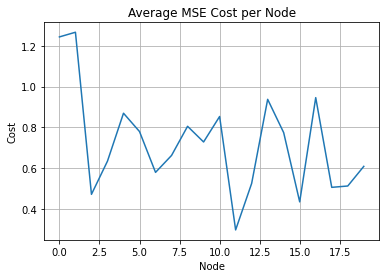

Average MSE: 0.7212


In [25]:
# Test the model:
cost_o, cost_t_o, tase_o = f_Eval_Model(model_o,test_dataset,test_time,N_n)

f1 = plt.figure()
f_Plot_Cost(cost_t_o,xaxis='Time Step',yaxis='Cost',title='MSE Cost per Time')
plt.show()

f1 = plt.figure()
f_Plot_Cost(tase_o,xaxis='Node',yaxis='Cost',title='Average MSE Cost per Node')
plt.show()

print("Average MSE: {:.4f}".format(cost_o))

### Build the Expanded Model

Here, we double the number of nodes in the graph in order to model higher-order effects. The new nodes represent the time derivatives of the original nodes. We add edges using Markov assumptions on the relations between positions and velocities.

In [26]:
# Compute derivatives and concatenate them with states:
def f_Concat_Derivatives(x,x_i,y,y_i):
  dx = x - x_i # Compute derivative
  x_i = x # Update previous state
  # Create new prediction vector of x and dx:
  X = np.concatenate((x,dx))

  dy = y - y_i # Compute derivative
  y_i = y # Update previous prediction
  # Create new prediction vector of y and dy:
  Y = np.concatenate((y,dy))

  return X, Y, x_i, y_i

In [27]:
# Train Model, with options to expand the graph and sample
def f_Train_Model_V2(model,optimizer,train_dataset,N_n,N_f,n_epochs=200,expand=0,sa=0,sampler=0,num_hops=2*N_n,k=int(0.5*N_n)):
  # INPUTS:
    # Model: neural net model type
    # optimizer: optimizer type (e.g. Adam)
    # train_datest: training data
    # N_n: number of nodes in the original graph
    # N_f: number of features
  
    # HYPERPARAMETERS:
    # n_epochs: Number of training epochs
    # expand (indicator variable):
      # 1 if the graph will be expanded
      # 0 if not
    # sa (indicator variable):
      # 1 if the v nodes in the expanded graph are fully connected with each other
      # 0 if the v nodes in the expanded graph follow the same connectivity
      # pattern as in the original graph
    # sampler (indicator variable):
      # 0 if no sampler will be used
      # 1 if the k-edge deletion sampler will be used
      # 2 if the random-walk sampler will be used
    # num_hops: Number of hops per iteration in the random walk sampler
    # k: Number of edges to randomly drop per iteration in k-edge deletion sampler

  # OUTPUTS:
    # model: trained model
    # cost_v: array of MSE cost at each epoch
    # cost1_v: array of MSE cost at each epoch for the original features
    # cost2_v: array of MSE cost at each epoch for the new features
      # (if the graph has not been unexpanded, this is an array of 0s)

  model.train()

  cost_v = np.zeros(n_epochs) # Initialize array of average costs per epoch
  cost1_v = np.zeros(n_epochs) # Initialize array of costs for original nodes
  cost2_v = np.zeros(n_epochs) # Initialize array of costs for new nodes

  for epoch in tqdm(np.arange(n_epochs)):
      cost = 0 # Total cost for epoch
      if expand == 1: # Expand the graph
        cost1 = 0 # Cost for original nodes
        cost2 = 0 # Cost for new nodes

      for time, snapshot in enumerate(train_dataset):

          edge_index = np.array(snapshot.edge_index) # Np array of edge list
          edge_attr = np.array(snapshot.edge_attr) # Np array of edge attributes

          if expand == 1: # Expand the graph

            # Get current x, y, edge list, edge attribute list:
            x = np.array(snapshot.x)
            y = np.array(snapshot.y)

            # Initialize the previous state to the first state, so that
            # the first derivative is zero.
            if time == 0:
              x_i = x
              y_i = y

            # Compute derivatives and concatenate them with states:
            x2, y2, x_i, y_i = f_Concat_Derivatives(x,x_i,y,y_i)

            x2 = torch.from_numpy(x2).type(torch.FloatTensor)
            # Reshape snapshot.y from size N_n to size (N_n,1):
            y2 = torch.from_numpy(y2.reshape((2*N_n,1)))

            # Expand the graph (doubles nodes and roughly doubles edges)
            edge_index_2, edge_attr_2, _ = f_Expand_Graph(N_n,edge_index,sa=sa)

          else: # Don't expand the graph
            x2 = snapshot.x
            # Reshape snapshot.y from size N_n to size (N_n,1):
            y2 = torch.from_numpy(np.array(snapshot.y).reshape((N_n,1)))

            edge_index_2 = edge_index
            edge_attr_2 = edge_attr

          if sampler == 1: # Use k-edge deletion sampler
            # Randomly delete k edges:
            edge_index_2, edge_attr_2 = f_delete_k_edges(edge_index_2,edge_attr_2,k)

          elif sampler == 2: # Use random walk sampler
            _, edge_index_2, edge_attr_2 = f_Random_Walk_Sampler(num_hops,N_n,edge_index_2,edge_attr_2)

          else: # Use full graph (no sampling)
            pass

          # Convert to tensors:
          edge_index = torch.from_numpy(edge_index_2)
          edge_attr = torch.from_numpy(edge_attr_2).type(torch.FloatTensor)

          y2_hat = model(x2, edge_index, edge_attr) # Predicted y2

          # Errors:
          error = y2_hat-y2

          # MSE Costs:
          cost += torch.mean(error**2)

          if expand == 1:
            error1 = error[0:N_n,:]
            error2 = error[N_n:,:]

            cost1 += torch.mean(error1**2)
            cost2 += torch.mean(error2**2)

      cost /= (time+1) # Average cost over all time steps
      cost_v[epoch] = cost # Add average epoch costs to array

      if expand == 1: # If graph was expanded
        # Average costs over all time steps:
        cost1 /= (time+1)
        cost2 /= (time+1)
        # Add average epoch costs to arrays:
        cost1_v[epoch] = cost1
        cost2_v[epoch] = cost2
      else: # If graph was not expanded
        cost1_v[epoch] = cost # cost1_v = cost_v (since there are no new nodes)

      # Backprop:
      cost.backward()
      optimizer.step()
      optimizer.zero_grad() # Zero out gradient

  return model, cost_v, cost1_v, cost2_v

In [28]:
# Evaluate the (expanded) model
def f_Eval_Model_V2(model,test_dataset,test_time,N_n,expand=0):
# INPUTS:
#   model: neural net model type
#   test_dataset: testing data
#   test_time: number of time steps in test dataset
#   N_n: number of nodes in original graph
#   expand (indicator variable):
      # 1 if the graph was expanded during training
      # 0 if not

# OUTPUTS:
#   cost: Average cost for an epoch
#   cost1: Average cost for original nodes for an epoch
#   cost2: Average cost for new nodes for an epoch
#   cost_t: Time history of costs
#   cost1_t: Time history of costs for original nodes
#   cost2_t: Time history of costs for new nodes
#   tase: Time-average squared error for each node
#   tase1: Time-average squared error for each original node
#   tase2: Time-average squared error for each new node

  model.eval()
  cost = 0 # Average cost for an epoch
  tase = 0 # Time-average square error

  # Vars for old nodes and new nodes:
  cost1 = 0
  cost2 = 0
  tase1 = 0
  tase2 = 0

  cost_t = np.zeros(test_time+1) # Array of costs for each time_step
  cost1_t = np.zeros(test_time+1) # Array of costs for each time_step
  cost2_t = np.zeros(test_time+1) # Array of costs for each time_step
  for time, snapshot in enumerate(test_dataset):
      y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
      # Reshape snapshot.y from size N_n to size (N_n,1):
      y = torch.from_numpy(np.array(snapshot.y).reshape((N_n,1)))
      error = y_hat - y # Error
      tase += error**2 # Time-average square error
      cost += torch.mean(error**2) # Add cost for time step to total cost for epoch
      cost_t[time] = torch.mean(error**2) # Add cost to array

      if expand == 1: # If graph was expanded
        error1 = error[0:N_n]
        error2 = error[N_n:]
        cost1 += torch.mean(error1**2)
        cost2 += torch.mean(error2**2)
        cost1_t[time] = torch.mean(error1**2)
        cost2_t[time] = torch.mean(error2**2)
        tase1 += error1**2
        tase2 += error2**2

  # Average over time elapsed:
  cost /= (time+1)
  tase /= (time+1)
  cost = cost.item()
  tase = tase.detach().cpu().numpy()

  if expand == 1:
    cost1 /= (time+1)
    tase1 /= (time+1)
    cost1 = cost1.item()
    cost2 /= (time+1)
    tase2 /= (time+1)
    cost2 = cost2.item()
    tase1 = tase1.detach().cpu().numpy()
    tase2 = tase2.detach().cpu().numpy()
  
  return cost, cost1, cost2, cost_t, cost1_t, cost2_t, tase, tase1, tase2

### Test the Sampling Functions:

Testing Sampler 1 (deleting k edges at random at each iteration):

In [29]:
from tqdm import tqdm

model = DCRNN_net(node_features=N_f)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
k = int(0.5*N_n) # Delete half of the edges at each iteration
model_s1, cost_v_s1, cost1_v_s1, cost2_v_s1 = f_Train_Model_V2(model,optimizer,train_dataset,N_n,N_f=4,n_epochs=200,expand=0,sa=0,sampler=1,num_hops=N_n,k=k)

100%|██████████| 200/200 [02:43<00:00,  1.22it/s]


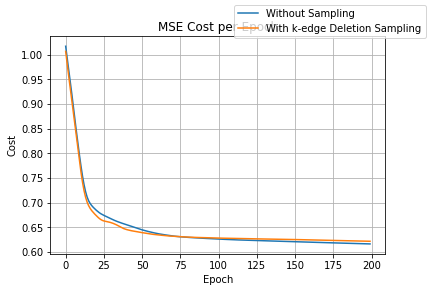

Average Testing MSE for Original Model: 0.7212
Average Testing MSE for Sampled Model: 0.7220


In [30]:
f1 = plt.figure()
f_Plot_Cost(cost_v_o,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
f_Plot_Cost(cost1_v_s1,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
plt.grid('on')
f1.legend(['Without Sampling', 'With k-edge Deletion Sampling'])
plt.show()

# Test the model:
cost_s1, cost_t_s1, tase_s1 = f_Eval_Model(model_s1,test_dataset,test_time,N_n)

print("Average Testing MSE for Original Model: {:.4f}".format(cost_o))
print("Average Testing MSE for Sampled Model: {:.4f}".format(cost_s1))

Test Sampler 2 (using a random walk to generate a subgaph at each iteration):

In [31]:
from tqdm import tqdm

model = DCRNN_net(node_features=N_f)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_hops = N_n # The number of steps in the random walk is equal to the number of nodes
model_s2, cost_v_s2, cost1_v_s2, cost2_v_s2 = f_Train_Model_V2(model,optimizer,train_dataset,N_n,N_f=4,n_epochs=200,expand=0,sa=0,sampler=2,num_hops=num_hops,k=int(0.5*N_n))

100%|██████████| 200/200 [06:02<00:00,  1.81s/it]


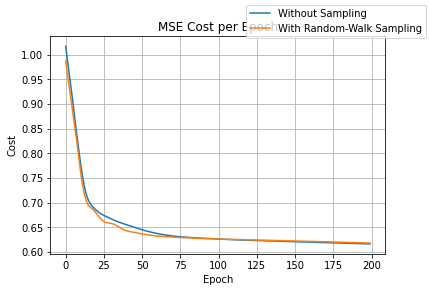

Average Testing MSE for Original Model: 0.7212
Average Testing MSE for Sampled Model: 0.7189


In [32]:
f1 = plt.figure()
f_Plot_Cost(cost_v_o,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
f_Plot_Cost(cost1_v_s2,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
plt.grid('on')
f1.legend(['Without Sampling', 'With Random-Walk Sampling'])
plt.show()

# Test the model:
cost_s2, cost_t_s2, tase_s2 = f_Eval_Model(model_s2,test_dataset,test_time,N_n)

print("Average Testing MSE for Original Model: {:.4f}".format(cost_o))
print("Average Testing MSE for Sampled Model: {:.4f}".format(cost_s2))

Note: Training with sampling actually take longer than without sampling, due to the cost of running the samplers.

### Test the performance of the Expanded Model:

In [33]:
from tqdm import tqdm

model = DCRNN_net(node_features=N_f)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model_e, cost_v_e, cost1_v_e, cost2_v_e = f_Train_Model_V2(model,optimizer,train_dataset,N_n,N_f=4,n_epochs=200,expand=1,sa=0,sampler=0,num_hops=2*N_n,k=int(0.5*N_n))

100%|██████████| 200/200 [05:49<00:00,  1.75s/it]


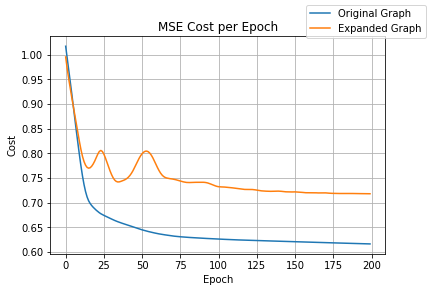

In [34]:
# f_Plot_Cost(cost_v,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')

f1 = plt.figure()
f_Plot_Cost(cost_v_o,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
f_Plot_Cost(cost1_v_e,xaxis='Epoch',yaxis='Cost',title='MSE Cost per Epoch')
plt.grid('on')
f1.legend(['Original Graph', 'Expanded Graph'])
plt.show()

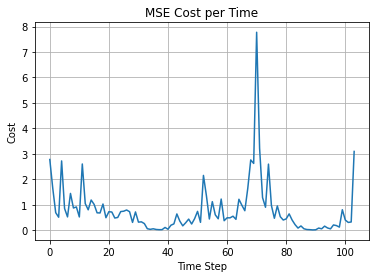

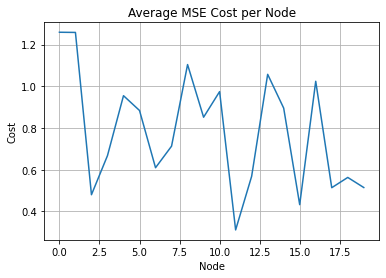

Average Testing MSE for Original Model: 0.7212
Average Testing MSE for Expanded Model: 0.7820


In [35]:
# Test the model:
# cost_e, cost_t_e, tase_e = f_Eval_Model(model_e,test_dataset,test_time,N_n)
cost_e, cost1_e, cost2_e, cost_t_e, cost1_t_e, cost2_t_e, tase_e, tase1_e, tase2_e = f_Eval_Model_V2(model_e,test_dataset,test_time,N_n,expand=1)
f1 = plt.figure()
f_Plot_Cost(cost1_t_e,xaxis='Time Step',yaxis='Cost',title='MSE Cost per Time')
plt.show()

f1 = plt.figure()
f_Plot_Cost(tase1_e,xaxis='Node',yaxis='Cost',title='Average MSE Cost per Node')
plt.show()

print("Average Testing MSE for Original Model: {:.4f}".format(cost_o))
print("Average Testing MSE for Expanded Model: {:.4f}".format(cost_e))

### Adaptive GNN

Here, we build a GNN model which iteratively expands during training. After training the original network, we select the node with the worst average cost and expand it into two nodes: one representing the original state, and the other representing its time derivative. We then restart training (not strictly necessary, but easier implementation). We continue for several iterations.

In [36]:
# Compute derivatives and concatenate them with states:
def f_Concat_Derivatives_V2(x,x_expand,x_i,y,y_expand,y_i):

  dx = x_expand - x_i # Compute derivative
  x_i = x_expand # Update previous state
  # Create new state vector of x and dx:
  X = np.concatenate((x,dx))

  dy = y_expand - y_i # Compute derivative
  y_i = y_expand # Update previous prediction
  # Create new prediction vector of y and dy:
  Y = np.concatenate((y,dy))

  return X, Y, x_i, y_i

In [37]:
# Train Model, with options to expand the graph and sample
def f_Train_Model_V3(model,optimizer,train_dataset,expand_node_v,N_n,N_f,n_epochs=200,expand=1,sa=0,sampler=0,num_hops=2*N_n,k=int(0.5*N_n)):
  # INPUTS:
    # Model: neural net model type
    # optimizer: optimizer type (e.g. Adam)
    # train_datest: training data
    # expand_node_v: list of nodes to expand
    # N_n: number of nodes in the original graph
    # N_f: number of features
  
    # HYPERPARAMETERS:
    # n_epochs: Number of training epochs
    # expand (indicator variable):
      # 1 if the graph will be expanded
      # 0 if not
    # sa (indicator variable):
      # 1 if the v nodes in the expanded graph are fully connected with each other
      # 0 if the v nodes in the expanded graph follow the same connectivity
      # pattern as in the original graph
    # sampler (indicator variable):
      # 0 if no sampler will be used
      # 1 if the k-edge deletion sampler will be used
      # 2 if the random-walk sampler will be used
    # num_hops: Number of hops per iteration in the random walk sampler
    # k: Number of edges to randomly drop per iteration in k-edge deletion sampler

  # OUTPUTS:
    # model: trained model
    # cost_v: array of MSE cost at each epoch
    # cost1_v: array of MSE cost at each epoch for the original features
    # cost2_v: array of MSE cost at each epoch for the new features
      # (if the graph has not been unexpanded, this is an array of 0s)
    # edge_list_2: updated_edge_list (after expanding)

  model.train()

  cost_v = np.zeros(n_epochs) # Initialize array of average costs per epoch
  cost1_v = np.zeros(n_epochs) # Initialize array of costs for original nodes
  cost2_v = np.zeros(n_epochs) # Initialize array of costs for new nodes

  for epoch in tqdm(np.arange(n_epochs)):
      cost = 0 # Total cost for epoch
      
      if expand == 1: # Expand the graph
        cost1 = 0 # Cost for original nodes
        cost2 = 0 # Cost for new nodes

      for time, snapshot in enumerate(train_dataset):

        # Get current x, y, edge list, edge attribute list:
        x = np.array(snapshot.x)
        y = np.array(snapshot.y)

        edge_index = np.array(snapshot.edge_index) # Np array of edge list
        edge_attr = np.array(snapshot.edge_attr) # Np array of edge attributes

        if expand == 1: # Expand the graph

          # Expand the graph
          edge_index, edge_attr, _, _ = f_Expand_N_Nodes(N_n,edge_index,edge_attr,expand_node_v,sa=sa)

          x_expand = x[expand_node_v,:]
          y_expand = y[expand_node_v]

          # Initialize the previous state to the first state, so that
          # the first derivative is zero.
          if time == 0:
            x_i = x_expand
            y_i = y_expand

          X, Y, x_i, y_i = f_Concat_Derivatives_V2(x,x_expand,x_i,y,y_expand,y_i)

          X = torch.from_numpy(X).type(torch.FloatTensor)
          # Reshape snapshot.y:
          Y = torch.from_numpy(Y.reshape((N_n+np.shape(expand_node_v)[0],1)))

        else:
          X = x
          Y = y

          X = torch.from_numpy(X).type(torch.FloatTensor)
          # Reshape snapshot.y:
          Y = torch.from_numpy(Y.reshape((N_n,1)))


        if sampler == 1: # Use k-edge deletion sampler
          # Randomly delete k edges:
          edge_index, edge_attr = f_delete_k_edges(edge_index,edge_attr,k)

        elif sampler == 2: # Use random walk sampler
          _, edge_index, edge_attr = f_Random_Walk_Sampler(num_hops,N_n,edge_index,edge_attr)

        else: # Use full graph (no sampling)
          pass

        # Convert to tensors:
        edge_index = torch.from_numpy(edge_index)
        edge_attr = torch.from_numpy(edge_attr).type(torch.FloatTensor)

        Y_hat = model(X, edge_index, edge_attr) # Predicted Y

        # Errors:
        error = Y_hat-Y

        # MSE Costs:
        cost += torch.mean(error**2)

        if expand == 1:
          error1 = error[0:N_n,:]
          error2 = error[N_n:,:]

          cost1 += torch.mean(error1**2)
          cost2 += torch.mean(error2**2)

      cost /= (time+1) # Average cost over all time steps
      cost_v[epoch] = cost # Add average epoch costs to array

      if expand == 1: # If graph was expanded
        # Average costs over all time steps:
        cost1 /= (time+1)
        cost2 /= (time+1)
        # Add average epoch costs to arrays:
        cost1_v[epoch] = cost1
        cost2_v[epoch] = cost2
      else: # If graph was not expanded
        cost1_v[epoch] = cost # cost1_v = cost_v (since there are no new nodes)

      # Backprop:
      cost.backward()
      optimizer.step()
      optimizer.zero_grad() # Zero out gradient

  return model, cost_v, cost1_v, cost2_v, edge_index

In [38]:
# This function iteratively expands the GNN:
# At each iteration, the node with the highest time-average testing cost
# is expanded into 2 nodes. (Only nodes from the original graph are expanded, so
# there are a maximum of N_n expansions, where N_n is the number of nodes in
# the original graph.)
def f_Adaptive_GNN(model,optimizer,train_dataset,N_n,N_f,n_epochs,N_expansions,sa,sampler,num_hops,k):
 # INPUTS:
    # model: neural net model type
    # optimizer: optimizer type (e.g. Adam)
    # train_datest: training data
    # N_n: number of nodes in the original graph
    # N_f: number of features
  
    # HYPERPARAMETERS:
    # n_epochs: Number of training epochs
    # N_expansions: Max number of graph expansions to try
    # sa (indicator variable):
      # 1 if the v nodes in the expanded graph are fully connected with each other
      # 0 if the v nodes in the expanded graph follow the same connectivity
      # pattern as in the original graph
    # sampler (indicator variable):
      # 0 if no sampler will be used
      # 1 if the k-edge deletion sampler will be used
      # 2 if the random-walk sampler will be used
    # num_hops: Number of hops per iteration in the random walk sampler
    # k: Number of edges to randomly drop per iteration in k-edge deletion sampler

  # OUTPUTS:
    # cost_vector: Array of MSE testing costs for each GNN architecture

  expand_node_v = [] # List of nodes to expand
  # Train the unexpanded model:
  model_a1, cost_v_a1, _, _= f_Train_Model_V2(model,optimizer,train_dataset,N_n,N_f=N_f,n_epochs=n_epochs,expand=0,sa=sa,sampler=sampler,num_hops=num_hops,k=k)
  cost_a1, cost_t_a1, tase_a1 = f_Eval_Model(model_a1,test_dataset,test_time,N_n) # Evaluate the model
  cost_vector = [cost_a1] # Add the MSE testing cost to an array

  tase_a = tase_a1 # Set time-average square error to first value
  for i in np.arange(N_expansions): # Expand the graph N_expansions time
    expand_node = np.argmax(tase_a) # Find the node with the worst testing time-average cost for the previous model
    expand_node_v.append(expand_node) # Add this node to expand_node_v
    # Train the expanded model:
    model_a, cost_v_a, cost1_v_a, cost2_v_a, _ = f_Train_Model_V3(model,optimizer,train_dataset,expand_node_v,N_n,N_f=N_f,n_epochs=n_epochs,expand=1,sa=sa,sampler=sampler,num_hops=num_hops,k=k)
    cost_a, cost_t_a, tase_a = f_Eval_Model(model_a1,test_dataset,test_time,N_n) # Evaluate the model
    cost_vector.append(cost_a) # Append the MSE testing cost

  return cost_vector

### Test the Adaptive GNN Algorithm:

In [41]:
from tqdm import tqdm

model = DCRNN_net(node_features=N_f)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
N_f = 4
n_epochs = 100
sa=0
sampler=0
num_hops=2*N_n
k=int(0.5*N_n)
N_expansions = 5

cost_vector = f_Adaptive_GNN(model,optimizer,train_dataset,N_n,N_f,n_epochs,N_expansions,sa,sampler,num_hops,k)

100%|██████████| 100/100 [05:32<00:00,  3.32s/it]


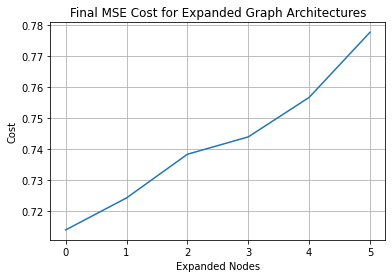

In [42]:
f1 = plt.figure()
f_Plot_Cost(cost_vector,xaxis='Expanded Nodes',yaxis='Cost',title='Final MSE Cost for Expanded Graph Architectures')
plt.grid('on')
plt.show()